In [7]:
import pandas as pd
import numpy as np  
import matplotlib.pylab as plt
import seaborn as sns
import os
%matplotlib inline

In [9]:
print(os.path.exists('input/olympics-economics.csv')) 

True


In [11]:
df=pd.read_csv('input/olympics-economics.csv')
print(df.head(5))

         country country_code  gold  silver  bronze  total       gdp  \
0  United States          USA    40      44      42    126  81695.19   
1          China          CHN    40      27      24     91  12614.06   
2          Japan          JPN    20      12      13     45  33834.39   
3      Australia          AUS    18      19      16     53  64711.77   
4         France          FRA    16      26      22     64  44460.82   

   gdp_year  population  
0      2023       334.9  
1      2023      1410.7  
2      2023       124.5  
3      2023        26.6  
4      2023        68.2  


In [25]:
print(df.head(10))

         country country_code  gold  silver  bronze  total       gdp  gdp_year  population
0  United States          USA    40      44      42    126  81695.19      2023       334.9
1          China          CHN    40      27      24     91  12614.06      2023      1410.7
2          Japan          JPN    20      12      13     45  33834.39      2023       124.5
3      Australia          AUS    18      19      16     53  64711.77      2023        26.6
4         France          FRA    16      26      22     64  44460.82      2023        68.2
5    Netherlands          NLD    15       7      12     34  62536.73      2023        17.9
6  Great Britain          GBR    14      22      29     65  48866.60      2023        68.3
7    South Korea          KOR    13       9      10     32  33121.37      2023        51.7
8          Italy          ITA    12      13      15     40  38373.17      2023        58.8
9        Germany          DEU    12      13       8     33  52745.76      2023        84.5

In [21]:
pd.set_option('display.width', 1000) 

In [27]:
df.tail(10)

country country_code  gold  silver  bronze  total       gdp  gdp_year  population
80      Grenada          GRD     0       0       2      2  10463.65      2023         0.1
81     Malaysia          MYS     0       0       2      2  11648.67      2023        34.3
82  Puerto Rico          PRI     0       0       2      2  36779.06      2023         3.2
83   Cape Verde          CPV     0       0       1      1   4321.58      2023         0.6
84  Ivory Coast          CIV     0       0       1      1   2728.80      2023        28.9
85         Peru          PER     0       0       1      1   7789.87      2023        34.4
86        Qatar          QAT     0       0       1      1  87480.42      2022         2.7
87    Singapore          SGP     0       0       1      1  84734.26      2023         5.9
88     Slovakia          SVK     0       0       1      1  24470.24      2023         5.4
89       Zambia          ZMB     0       0       1      1   1369.13      2023        20.6

In [29]:
df['gdp'].dtype

dtype('float64')

In [33]:
df.dtypes

country          object
country_code     object
gold              int64
silver            int64
bronze            int64
total             int64
gdp             float64
gdp_year          int64
population      float64
dtype: object

In [37]:
bins = [0, 5000, 20000,50000, 80000,  100000, float('inf')]
labels = ['0-5000', '5000-20000', '20000-50000', '50000-80000', '80000-100000',  '100000+']
df['gdp_group'] = pd.cut(df['gdp'], bins=bins, labels=labels, right=False)
gdp_group_count = df.groupby('gdp_group',observed=False).size().reset_index(name='country_count')
print(gdp_group_count)

      gdp_group  country_count
0        0-5000             19
1    5000-20000             34
2   20000-50000             20
3   50000-80000             11
4  80000-100000              5
5       100000+              1


In [45]:
medals_by_gdp_group = df.groupby('gdp_group',observed=True).agg(
    total_gold=('gold', 'sum'),
    total_silver=('silver', 'sum'),
    total_bronze=('bronze', 'sum'),
    total_medals=('total', 'sum') 
).reset_index()

print(medals_by_gdp_group)


      gdp_group  total_gold  total_silver  total_bronze  total_medals
0        0-5000          25            22            36            83
1    5000-20000          74            85            84           243
2   20000-50000         110           114           135           359
3   50000-80000          70            59            73           202
4  80000-100000          45            47            52           144
5       100000+           4             0             3             7


In [47]:
medals_by_gdp_group

gdp_group  total_gold  total_silver  total_bronze  total_medals
0        0-5000          25            22            36            83
1    5000-20000          74            85            84           243
2   20000-50000         110           114           135           359
3   50000-80000          70            59            73           202
4  80000-100000          45            47            52           144
5       100000+           4             0             3             7

In [49]:
medals_by_gdp_group = df.groupby('gdp_group',observed=True).agg(
    total_gold=('gold', 'sum'),
    total_silver=('silver', 'sum'),
    total_bronze=('bronze', 'sum'),
    total_medals=('total', 'sum') )

medals_by_gdp_group

total_gold  total_silver  total_bronze  total_medals
gdp_group                                                         
0-5000                25            22            36            83
5000-20000            74            85            84           243
20000-50000          110           114           135           359
50000-80000           70            59            73           202
80000-100000          45            47            52           144
100000+                4             0             3             7

In [51]:
df.replace("?", np.nan, inplace = True)

In [53]:
df_sub=df[df['gdp']>50000]
df_sub

country country_code  gold  silver  bronze  total        gdp  gdp_year  population     gdp_group
0   United States          USA    40      44      42    126   81695.19      2023       334.9  80000-100000
3       Australia          AUS    18      19      16     53   64711.77      2023        26.6   50000-80000
5     Netherlands          NLD    15       7      12     34   62536.73      2023        17.9   50000-80000
9         Germany          DEU    12      13       8     33   52745.76      2023        84.5   50000-80000
11         Canada          CAN     9       7      11     27   53371.70      2023        40.1   50000-80000
15         Sweden          SWE     4       4       3     11   56305.25      2023        10.5   50000-80000
17         Norway          NOR     4       1       3      8   87961.78      2023         5.5  80000-100000
18        Ireland          IRL     4       0       3      7  103684.88      2023         5.3       100000+
24        Belgium          BEL     3       1       6     10   53475.29      2023        11.8   50000-80000
28        Denmark          DNK     2       2       5      9   67967.38      2023         5.9   50000-80000
31           Cuba          CUB     2       1       6      9   56495.85      2022        11.2   50000-80000
35        Austria          AUT     2       0       3      5   56505.97      2023         9.1   50000-80000
36      Hong Kong          HKG     2       0       2      4   50696.59      2023         7.5   50000-80000
40         Israel          ISR     1       5       1      7   52261.68      2023         9.8   50000-80000
47    Switzerland          CHE     1       2       5      8   99994.94      2023         8.8  80000-100000
86          Qatar          QAT     0       0       1      1   87480.42      2022         2.7  80000-100000
87      Singapore          SGP     0       0       1      1   84734.26      2023         5.9  80000-100000

In [55]:
df_sub=df_sub.drop('gdp_group', axis=1)
df_sub

country country_code  gold  silver  bronze  total        gdp  gdp_year  population
0   United States          USA    40      44      42    126   81695.19      2023       334.9
3       Australia          AUS    18      19      16     53   64711.77      2023        26.6
5     Netherlands          NLD    15       7      12     34   62536.73      2023        17.9
9         Germany          DEU    12      13       8     33   52745.76      2023        84.5
11         Canada          CAN     9       7      11     27   53371.70      2023        40.1
15         Sweden          SWE     4       4       3     11   56305.25      2023        10.5
17         Norway          NOR     4       1       3      8   87961.78      2023         5.5
18        Ireland          IRL     4       0       3      7  103684.88      2023         5.3
24        Belgium          BEL     3       1       6     10   53475.29      2023        11.8
28        Denmark          DNK     2       2       5      9   67967.38      2023         5.9
31           Cuba          CUB     2       1       6      9   56495.85      2022        11.2
35        Austria          AUT     2       0       3      5   56505.97      2023         9.1
36      Hong Kong          HKG     2       0       2      4   50696.59      2023         7.5
40         Israel          ISR     1       5       1      7   52261.68      2023         9.8
47    Switzerland          CHE     1       2       5      8   99994.94      2023         8.8
86          Qatar          QAT     0       0       1      1   87480.42      2022         2.7
87      Singapore          SGP     0       0       1      1   84734.26      2023         5.9

In [57]:
df_m3=df[df['gold']==3]
df_m3

country country_code  gold  silver  bronze  total       gdp  gdp_year  population    gdp_group
19          Brazil          BRA     3       7      10     20  10043.62      2023       216.4   5000-20000
20            Iran          IRN     3       6       3     12   4502.55      2023        89.2       0-5000
21         Ukraine          UKR     3       5       4     12   5181.36      2023        37.0   5000-20000
22         Romania          ROU     3       4       2      9  18419.42      2023        19.1   5000-20000
23         Georgia          GEO     3       3       1      7   8120.36      2023         3.8   5000-20000
24         Belgium          BEL     3       1       6     10  53475.29      2023        11.8  50000-80000
25        Bulgaria          BGR     3       1       3      7  15797.60      2023         6.4   5000-20000
26          Serbia          SRB     3       1       1      5  11360.96      2023         6.6   5000-20000
27  Czech Republic          CZE     3       0       2      5  30427.42      2023        10.9  20000-50000

In [59]:
df.describe()

gold     silver     bronze       total            gdp     gdp_year   population
count  90.000000  90.000000  90.000000   90.000000      90.000000    90.000000    90.000000
mean    3.644444   3.633333   4.255556   11.533333   24478.053556  2022.977778    69.027778
std     7.018933   6.797967   6.586607   19.782071   25547.857382     0.148231   213.286437
min     0.000000   0.000000   0.000000    1.000000    1014.210000  2022.000000     0.100000
25%     0.000000   0.000000   1.000000    2.000000    5815.180000  2023.000000     5.325000
50%     1.000000   1.000000   2.000000    5.000000   13061.185000  2023.000000    12.150000
75%     3.000000   3.000000   5.000000    9.000000   34484.677500  2023.000000    48.550000
max    40.000000  44.000000  42.000000  126.000000  103684.880000  2023.000000  1428.600000

In [61]:
df['gold'].value_counts()

gold
0     27
1     23
2     12
3      9
4      4
12     2
40     2
13     1
10     1
20     1
8      1
6      1
5      1
14     1
15     1
16     1
18     1
9      1
Name: count, dtype: int64

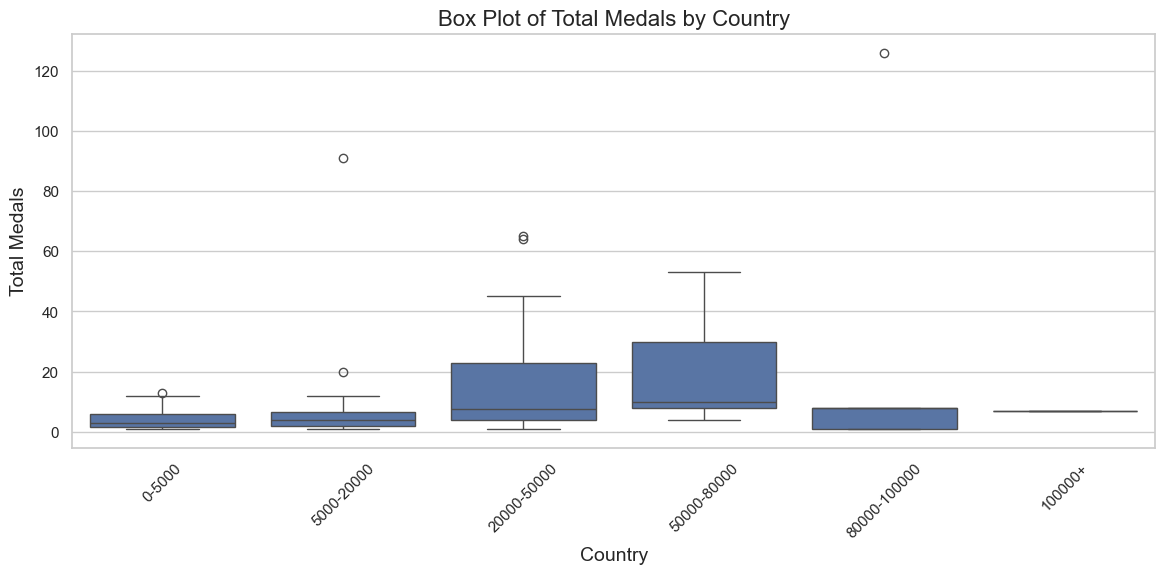

In [67]:
sns.set(style="whitegrid")

width_cm = 30
height_cm = 15
width_inch = width_cm / 2.54
height_inch = height_cm / 2.54

plt.figure(figsize=(width_inch, height_inch))
sns.boxplot(x='gdp_group', y='total', data=df)

plt.title('Box Plot of Total Medals by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Medals', fontsize=14)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

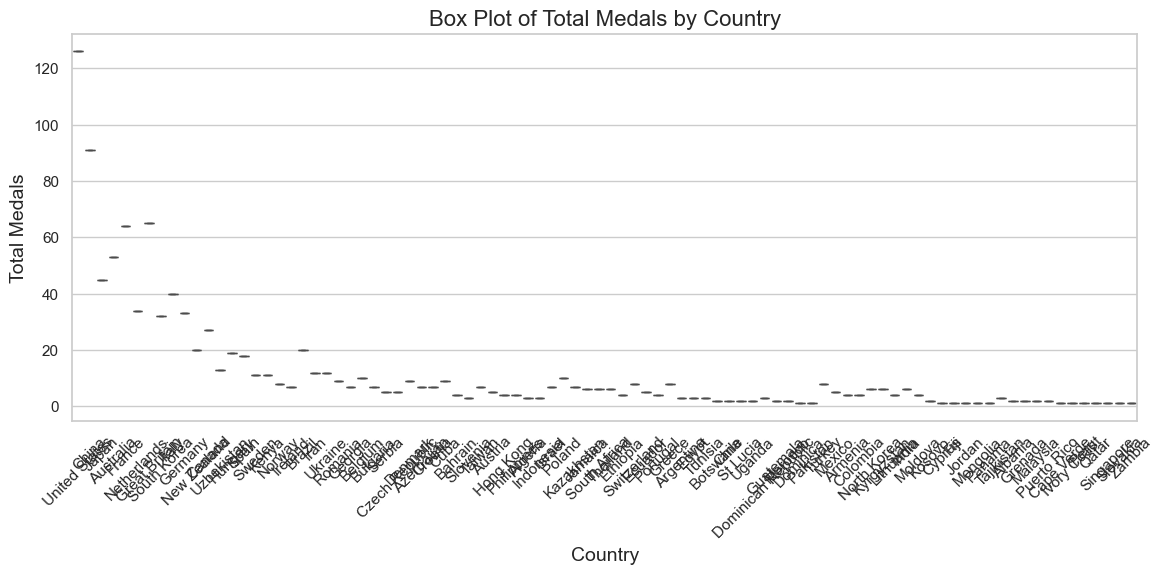

In [69]:
sns.set(style="whitegrid")

width_cm = 30
height_cm = 15
width_inch = width_cm / 2.54
height_inch = height_cm / 2.54

plt.figure(figsize=(width_inch, height_inch))
sns.boxplot(x='country', y='total', data=df)

plt.title('Box Plot of Total Medals by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Medals', fontsize=14)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:
df.dropna(subset=['gold', 'silver', 'bronze'])

country country_code  gold  silver  bronze  total       gdp  gdp_year  population     gdp_group
0   United States          USA    40      44      42    126  81695.19      2023       334.9  80000-100000
1           China          CHN    40      27      24     91  12614.06      2023      1410.7    5000-20000
2           Japan          JPN    20      12      13     45  33834.39      2023       124.5   20000-50000
3       Australia          AUS    18      19      16     53  64711.77      2023        26.6   50000-80000
4          France          FRA    16      26      22     64  44460.82      2023        68.2   20000-50000
..            ...          ...   ...     ...     ...    ...       ...       ...         ...           ...
85           Peru          PER     0       0       1      1   7789.87      2023        34.4    5000-20000
86          Qatar          QAT     0       0       1      1  87480.42      2022         2.7  80000-100000
87      Singapore          SGP     0       0       1      1  84734.26      2023         5.9  80000-100000
88       Slovakia          SVK     0       0       1      1  24470.24      2023         5.4   20000-50000
89         Zambia          ZMB     0       0       1      1   1369.13      2023        20.6        0-5000

[90 rows x 10 columns]

In [73]:
df_gptest = df[['country', 'total', 'population', 'gdp_group']]

In [75]:
df_gptest

country  total  population     gdp_group
0   United States    126       334.9  80000-100000
1           China     91      1410.7    5000-20000
2           Japan     45       124.5   20000-50000
3       Australia     53        26.6   50000-80000
4          France     64        68.2   20000-50000
..            ...    ...         ...           ...
85           Peru      1        34.4    5000-20000
86          Qatar      1         2.7  80000-100000
87      Singapore      1         5.9  80000-100000
88       Slovakia      1         5.4   20000-50000
89         Zambia      1        20.6        0-5000

[90 rows x 4 columns]

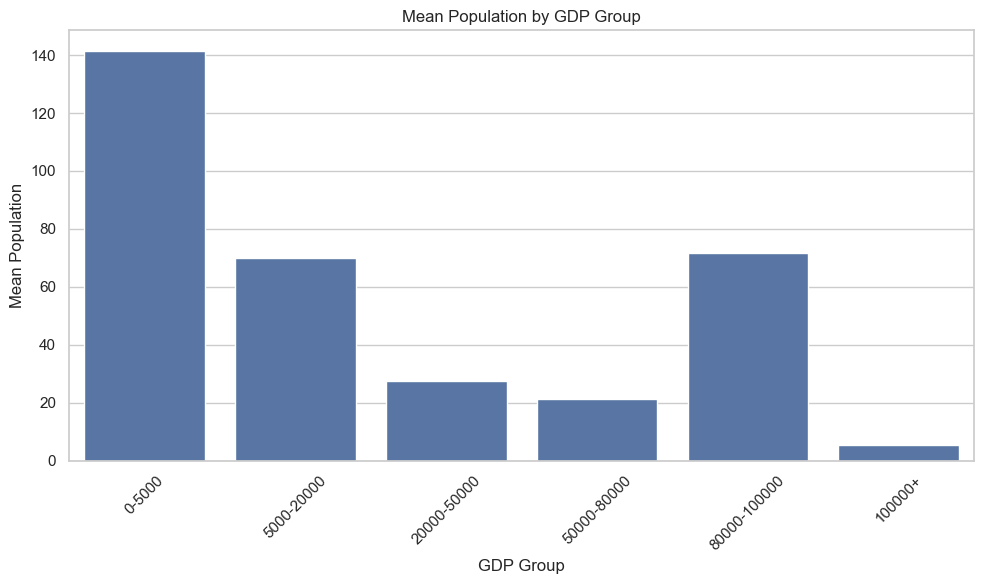

In [79]:
mean_population_by_gdp = df.groupby('gdp_group', observed=False)['population'].mean().reset_index()

plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x='gdp_group', y='population', data=mean_population_by_gdp)


plt.title('Mean Population by GDP Group')
plt.xlabel('GDP Group')
plt.ylabel('Mean Population')
plt.xticks(rotation=45) 
plt.tight_layout()       


plt.show()

In [81]:
numeric_df = df_gptest.select_dtypes(include='number')

In [83]:
numeric_df

total  population
0     126       334.9
1      91      1410.7
2      45       124.5
3      53        26.6
4      64        68.2
..    ...         ...
85      1        34.4
86      1         2.7
87      1         5.9
88      1         5.4
89      1        20.6

[90 rows x 2 columns]

In [85]:
from ydata_profiling import ProfileReport


ModuleNotFoundError: No module named 'ydata_profiling'

In [87]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 655.7/655.7 kB 3.3 MB/s eta 0:00:00-:--:--
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=2e42cb2d705db8dbceebd819f7d8ed37669a8513e44870c65ff3f2bae95a1524
  Stored in directory: /Users/nargizakhudoykulova/Library/Caches/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin


In [89]:
from ydata_profiling import ProfileReport

In [91]:
profile = ProfileReport(
    df, title="Car Dataset", html={"style": {"full_width": True}}, sort=None
)

In [95]:
profile.to_widgets()

In [101]:
profile.to_file("olympics_report.html")


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [103]:
profile.to_notebook_iframe()


In [105]:
print(os.getcwd())


/Users/nargizakhudoykulova


In [107]:
profile